In [19]:
import pandas as pd
path = '/Users/ghostcookie/Desktop/payAndDemographicsReport.csv'
demographicsData = pd.read_csv(path)
demographicsData.head()
demographicsData.isnull().sum()
demographicsData.info()
demographicsData.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76167 entries, 0 to 76166
Data columns (total 11 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Data Year                                          76167 non-null  int64  
 1   Agency Name                                        76167 non-null  object 
 2   Equal Employment Opportunity (EEO)-4 Job Category  76167 non-null  object 
 3   Pay Band                                           76167 non-null  object 
 4   Lower Pay Band Bound                               76167 non-null  float64
 5   Upper Pay Band Bound                               76167 non-null  float64
 6   Employee Status                                    76167 non-null  object 
 7   Race                                               76167 non-null  object 
 8   Ethnicity                                          76167 non-null  object 
 9   Gender

,Data Year,Lower Pay Band Bound,Upper Pay Band Bound
count,76167.000000,76167.000000,76167.000000
mean,2019.531201,74727.766014,79307.286766
std,1.107024,43951.964913,44680.162279
min,2018.000000,0.000000,2.990000
25%,2019.000000,45000.000000,49999.000000
50%,2020.000000,70000.000000,74999.000000
75%,2021.000000,100000.000000,104999.000000
max,2021.000000,290000.000000,294999.000000


In [20]:
def handle_ranges(value):
    if isinstance(value, str):
        if '<' in value:
            return 5
        elif '-' in value:
            low,high = value.split('-')
            return(int(low) + int(high)) / 2
        elif value == 'Unknown':
            return 0
    return value
demographicsData['Number of Employees'] = demographicsData['Number of Employees'].apply(handle_ranges)
demographicsData['Number of Employees'] = pd.to_numeric(demographicsData['Number of Employees'], errors='coerce')

In [21]:
grouped = demographicsData.groupby(['Ethnicity', 'Employee Status'])['Number of Employees'].sum().reset_index()

hispanicLatinoGrouped = grouped[grouped['Ethnicity'] == 'Hispanic or Latino']
nonHispanicLatinoGrouped = grouped[grouped['Ethnicity'] == 'Non-Hispanic or Latino']

print(f'Hispanic/Latino Grouped Data:{hispanicLatinoGrouped}')
print(f'Non-Hispanic/Latino Grouped Data:{nonHispanicLatinoGrouped}')

Hispanic/Latino Grouped Data:            Ethnicity Employee Status  Number of Employees
0  Hispanic or Latino       Full-Time               177494
1  Hispanic or Latino       Part-Time                11700
2  Hispanic or Latino        Seasonal                 4168
Non-Hispanic/Latino Grouped Data:                Ethnicity Employee Status  Number of Employees
3  Non-Hispanic or Latino       Full-Time               551807
4  Non-Hispanic or Latino       Part-Time                32522
5  Non-Hispanic or Latino        Seasonal                 9962


In [22]:
hispanicLatinoPt = hispanicLatinoGrouped[hispanicLatinoGrouped['Employee Status'] == 'Part-Time']['Number of Employees'].sum()
hispanicLatinoSeasonal = hispanicLatinoGrouped[hispanicLatinoGrouped['Employee Status'] == 'Seasonal']['Number of Employees'].sum()
hispanicLatinoSeasonalPt = hispanicLatinoPt + hispanicLatinoSeasonal

hispanicLatinoFt = hispanicLatinoGrouped[hispanicLatinoGrouped['Employee Status'] == 'Full-Time']['Number of Employees'].sum()

print(f"Hispanic/Latino Seasonal, Part-Time: {hispanicLatinoSeasonalPt}")
print(f"Hispanic/Latino Full-Time: {hispanicLatinoFt}")

Hispanic/Latino Seasonal, Part-Time: 15868
Hispanic/Latino Full-Time: 177494


In [23]:
nonHispanicLatinoPt = nonHispanicLatinoGrouped[nonHispanicLatinoGrouped['Employee Status'] == 'Part-Time']['Number of Employees'].sum()
nonHispanicLatinoSeasonal = nonHispanicLatinoGrouped[nonHispanicLatinoGrouped['Employee Status'] == 'Seasonal']['Number of Employees'].sum()
nonHispanicLatinoSeasonalPt = nonHispanicLatinoPt + nonHispanicLatinoSeasonal

nonHispanicLatinoFt = nonHispanicLatinoGrouped[nonHispanicLatinoGrouped['Employee Status'] == 'Full-Time']['Number of Employees'].sum()

print(f"Non-Hispanic/Latino Seasonal, Part-Time: {nonHispanicLatinoSeasonalPt}")
print(f"Non-Hispanic/Latino Full-Time: {nonHispanicLatinoFt}")

Non-Hispanic/Latino Seasonal, Part-Time: 42484
Non-Hispanic/Latino Full-Time: 551807


In [24]:
import pandas as pd
from scipy.stats import chi2_contingency
data = {
    'Hispanic/Latino': [15868, 177494],  # Seasonal/Part-Time, Full-Time for Hispanic/Latino
    'Non-Hispanic/Latino': [42484, 551807]  # Seasonal/Part-Time, Full-Time for Non-Hispanic/Latino
}

contingency_table = pd.DataFrame(data, index=['Seasonal/Part-Time', 'Full-Time'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
                    Hispanic/Latino  Non-Hispanic/Latino
Seasonal/Part-Time            15868                42484
Full-Time                    177494               551807


In [25]:

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test Results:")
print(f"Chi2 Statistic: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-Value: {p_value}")
print(f"Expected Counts: \n{expected}")

alpha = 0.05  # Significance level (5%)

if p_value < alpha:
    print("Reject the hypothesis: There is a significant difference in position type between Hispanic/Latino and Non-Hispanic employees.")
else:
    print("Fail to reject the null hypothesis: No significant difference in position type between Hispanic/Latino and Non-Hispanic employees.")



Chi-Square Test Results:
Chi2 Statistic: 237.77829159307
Degrees of Freedom: 1
P-Value: 1.1999035302932503e-53
Expected Counts: 
[[ 14324.91138103  44027.08861897]
 [179037.08861897 550263.91138103]]
Reject the hypothesis: There is a significant difference in position type between Hispanic/Latino and Non-Hispanic employees.


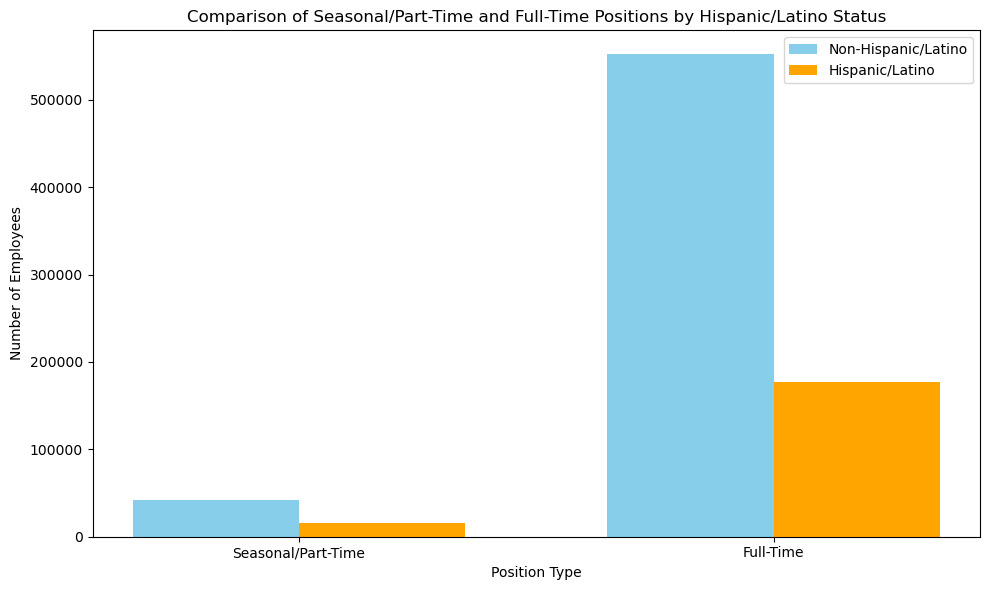

In [26]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Seasonal/Part-Time', 'Full-Time']
hispanic_latino_counts = [15868, 177494]
non_hispanic_latino_counts = [42484, 551807]


bar_width = 0.35
index = np.arange(len(categories))

plt.figure(figsize=(10, 6))


plt.bar(index, non_hispanic_latino_counts, bar_width, label='Non-Hispanic/Latino', color='skyblue')
plt.bar(index + bar_width, hispanic_latino_counts, bar_width, label='Hispanic/Latino', color='orange')


plt.xlabel('Position Type')
plt.ylabel('Number of Employees')
plt.title('Comparison of Seasonal/Part-Time and Full-Time Positions by Hispanic/Latino Status')
plt.xticks(index + bar_width / 2, categories)  # Adjust x-ticks to center
plt.legend()

plt.tight_layout()
plt.show()
